In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Prepare the data

In [2]:
data = load_iris() #shift+tab

In [3]:
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

In [4]:
display(df)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
X = df.to_numpy() # These are our features

In [6]:
df['target'] = data['target']

In [7]:
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])


In [8]:
df['species_name'] = named_targets

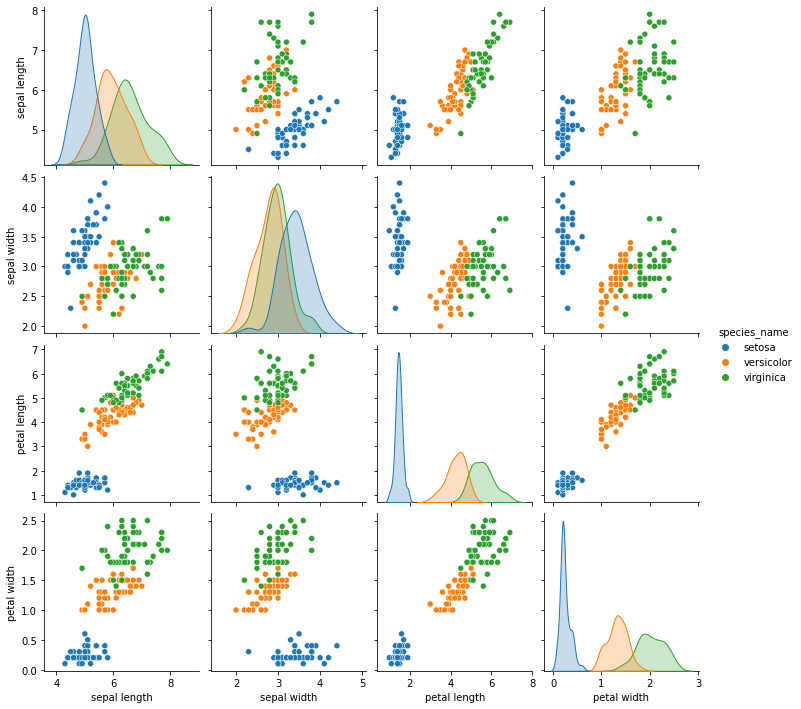

In [ ]:
# sns.pairplot(df, hue='target')
sns.pairplot(df.drop(labels=['target'],axis=1), hue='species_name')

# y will not be used because we are doing unsupervised learning

### ideally we should only split X because the data is supposed to be not labeled

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test =train_test_split(
    X,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

In [14]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)

X_train shape : (105, 4)
X_test shape : (45, 4)


### However, since we have labeled iris data we are going to split both X and y and just keep the y seperate. Also split indices to keep track of training and testing data

In [15]:
y = df['target'].to_numpy()

In [16]:
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

In [17]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (105, 4)
X_test shape : (45, 4)
y_train shape : (105,)
y_test shape : (45,)


In [29]:
# tag points with train or test labels

tag = []

for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')

print(tag)
df['tag'] = tag

['train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'test', 'test', 'test', 'test', 'train', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train'

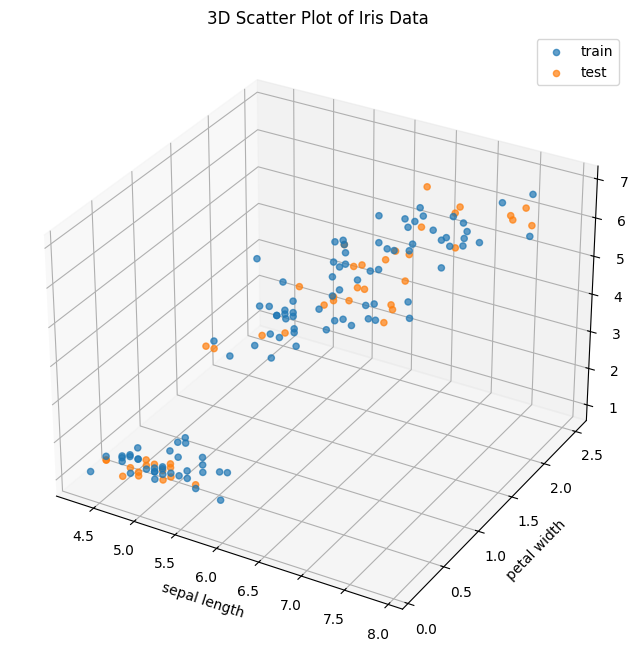

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting

# Assuming df, 'sepal length', 'petal width', 'petal length', 'tag' are defined

fig = plt.figure(figsize=(10, 8))  # Adjust figure size as needed
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot with color based on 'tag'
for tag_val in df['tag'].unique():
    subset = df[df['tag'] == tag_val]
    ax.scatter(subset['sepal length'], subset['petal width'], subset['petal length'],
               label=tag_val, alpha=0.7)  # Adjust alpha for transparency

# Set labels and title
ax.set_xlabel('sepal length')
ax.set_ylabel('petal width')
ax.set_zlabel('petal length')
ax.set_title('3D Scatter Plot of Iris Data')
ax.legend()

plt.show()

 since we used a good mix of points from everywhere selection bias is minimal.

## data preparation is complete (on to algorithms)
first i select 3 features

In [33]:
features = ['sepal length', 'petal width', 'petal length']
X = df[features].to_numpy()

In [34]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

In [35]:
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [1 1 1 1 1 0 0 1 2 0 1 0 1 0 1 2 1 1 2 0 0 2 2 1 0 1 1 2 1 1 1 1 1 2 2 1 1
 1 1 2 1 1 1 1 1]
cluster centroids: [[5.18846154 3.59230769 1.51538462 0.29230769]
 [6.24117647 2.86176471 4.90735294 1.66911765]
 [4.7        2.84545455 1.74545455 0.34545455]]


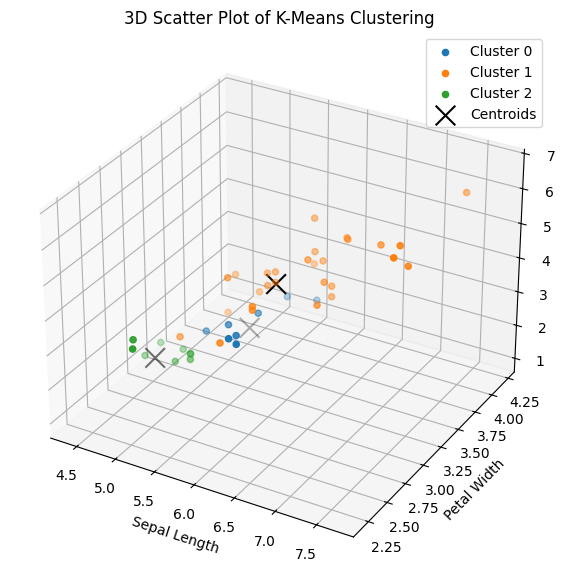

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming kmeans_labels and X_test are available
# Ensure X_test is a numpy array
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each cluster with different colors
for cluster_label in np.unique(kmeans_labels):
    ax.scatter(
        X_test[kmeans_labels == cluster_label, 0],
        X_test[kmeans_labels == cluster_label, 1],
        X_test[kmeans_labels == cluster_label, 2],
        label=f'Cluster {cluster_label}'
    )

# Plot cluster centroids
ax.scatter(
    cluster_coords[:, 0],
    cluster_coords[:, 1],
    cluster_coords[:, 2],
    s=200, c='black', marker='x', label='Centroids'
)

# Label axes
ax.set_title('3D Scatter Plot of K-Means Clustering')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')

plt.legend()
plt.show()


### Now Compare to Sklearn

### Resplit data for training and testing using the new X_3features

In [69]:
features = ['sepal length', 'petal width', 'petal length']  # Defining the 3 features to use
X_3features = df[features].to_numpy()  # Create a new dataset with only these 3 features

# Resplit data for training and testing using the new X_3features
X_train_3, X_test_3, y_train, y_test, idx_train, idx_test = train_test_split(
    X_3features, y, range(X_3features.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
)

# Re-initialize and fit the skmodel with the 3-feature training data
skmodel = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train_3)

KMeans(n_clusters=4)

In [70]:
skmodel.labels_ # training labels

array([3, 3, 0, 1, 1, 3, 1, 1, 3, 0, 0, 0, 3, 0, 3, 1, 3, 0, 1, 1, 3, 0,
       2, 2, 1, 0, 0, 3, 1, 2, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 1, 1, 0, 1,
       3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 2, 0, 0, 0, 1, 1, 3, 3, 1, 1, 0, 0,
       0, 2, 3, 0, 0, 2, 1, 1, 0, 2, 3, 2, 3, 1, 0, 1, 0, 0, 1, 0, 3, 0,
       3, 3, 1, 0, 1, 3, 3, 0, 0, 3, 0, 3, 1, 0, 0, 3, 2], dtype=int32)

In [71]:
skmodel.predict(X_test_3) # predict labels, remember the integers do not make same sense in training and testing for clustering

array([3, 3, 3, 0, 1, 3, 0, 1, 1, 0, 3, 1, 0, 3, 2, 3, 1, 1, 0, 1, 1, 3,
       1, 3, 1, 1, 1, 3, 2, 1, 2, 3, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 3,
       3], dtype=int32)

In [72]:
skmodel_labels = skmodel.predict(X_3features)

In [73]:
df['skmodel_labels'] = skmodel_labels

Graph Sklearn

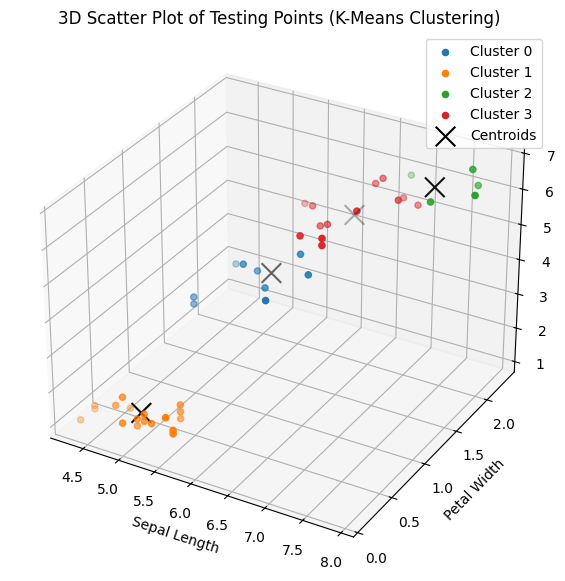

In [74]:
# Assuming X_test_3 and skmodel.predict(X_test_3) are available
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Get the predicted labels for the testing set
test_labels = skmodel.predict(X_test_3)

# Scatter plot each cluster with different colors
for cluster_label in np.unique(test_labels):
    ax.scatter(
        X_test_3[test_labels == cluster_label, 0],  # Sepal Length
        X_test_3[test_labels == cluster_label, 1],  # Petal Width
        X_test_3[test_labels == cluster_label, 2],  # Petal Length
        label=f'Cluster {cluster_label}'
    )

# Plot the centroids
centroids = skmodel.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    s=200, c='black', marker='x', label='Centroids'
)

# Set axis labels and title
ax.set_title('3D Scatter Plot of Testing Points (K-Means Clustering)')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')

plt.legend()
plt.show()


##Discussion

What happens when number of clusters changes? In this case, it makes less sense for the problem because we know there are 3 flowers. Therefore, it creates  groupings with no real world equivalent or physical/natural significance. Accuracy surely goes down because now an entire cluster belongs to none of the 3 flowers.

However, generally speaking, varying the number of clusters, k, in a k-means algorithm will affect the size of the clusters and how true it is to the data's true structure. Fewer clusters could potentially underfit and too many clusters risks overfitting. A good guess for k (if it is unknown) can be achieved using methods like the elbow method or silhouette analysis.

## Comparison
Kmeans++ , which  is used by default for Scikit’s implementation is an improvement on the K-Means algorithm. According to lecture, this version is much less likely to converge to a suboptimal solution compared to the previous version utilized in this notebook, modified from the algorithm provided in lecture.